In [18]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load and dispaly the data set
df = pd.read_csv('/content/titanic_dataset .csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# understand the shape of data
df.shape

(891, 12)

In [21]:
# check the informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# describe the data set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# check the null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
# Drop columns that are not useful for prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

<Axes: >

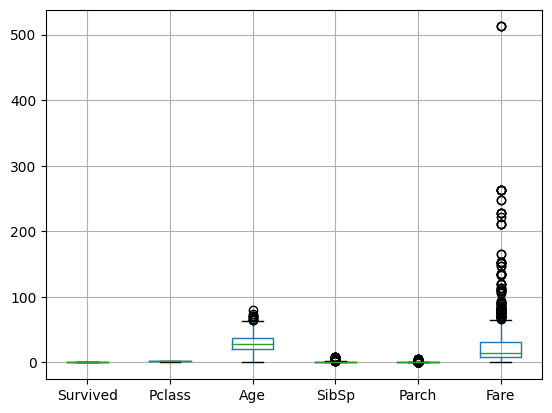

In [25]:
# create box plot for the data set
df.boxplot()

**Based on the data set, the outliers displayed in the boxplot may represent authentic values.**

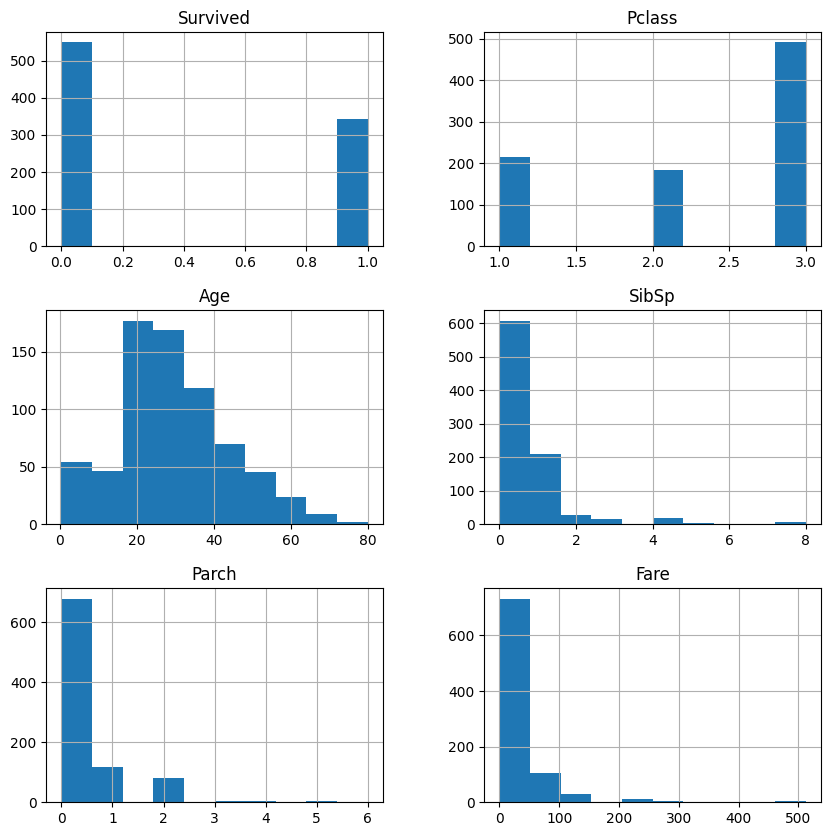

In [26]:
# create histogram for the data set
df.hist(figsize=(10,10))
plt.show()

In [27]:
# Handle missing values
from sklearn.impute import SimpleImputer
# Age fill with median
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [28]:
# Embarked fill with mode
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']]).ravel()

In [29]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [30]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


In [32]:
# check value counts of target variable
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [33]:
# Define the features and target variable
x = df.drop('Survived', axis=1)
y = df['Survived']

In [34]:
# split the training data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# **kNN Model**

In [35]:
# do the knn model and check best k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric_k = []
neigbors = np.arange(3,15)

for k in neigbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

metric_k

[0.7802690582959642,
 0.7847533632286996,
 0.7847533632286996,
 0.7937219730941704,
 0.7757847533632287,
 0.7713004484304933,
 0.7757847533632287,
 0.8026905829596412,
 0.7892376681614349,
 0.8071748878923767,
 0.7937219730941704,
 0.8026905829596412]

In [36]:
classifier = KNeighborsClassifier(n_neighbors=12, metric='minkowski',p=2)
classifier.fit(x_train,y_train)
# predict the values and check the accuracy
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8071748878923767

# **SVM Model**

In [37]:
# do the svm model
from sklearn.svm import SVC
sv_clf = SVC(kernel = 'linear')
sv_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
# predict the values and check the accuracy
y_pred = sv_clf.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred)
acc_svm

0.7847533632286996

# **K-Fold Cross Validation**

In [39]:
# Perform k-fold cross-validation (k=5)
from sklearn.model_selection import KFold
kfold_val = KFold(5)

In [40]:
# calculate the accuracies
from sklearn.model_selection import cross_val_score
Knn_kv_result = cross_val_score(classifier,x,y,cv=kfold_val)
svm_kv_result = cross_val_score(sv_clf,x,y,cv=kfold_val)

# **stratified cross validation**

In [41]:
# Perform stratified k-fold cross-validation (k=5)
from sklearn.model_selection import StratifiedKFold
sk_fold = StratifiedKFold(5)

In [42]:
# calculate the accuracies
Knn_skv_result = cross_val_score(classifier,x,y,cv=sk_fold)
svm_skv_result = cross_val_score(sv_clf,x,y,cv=sk_fold)

# **Result**

In [43]:
# Calculate average accuracy scores for each model
results = {
    'kNN_kfold_avg_accuracy': Knn_kv_result.mean(),
    'SVM_kfold_avg_accuracy': svm_kv_result.mean(),
    'kNN_skfold_avg_accuracy': Knn_skv_result.mean(),
    'SVM_skfold_avg_accuracy': svm_skv_result.mean()
}
results

{'kNN_kfold_avg_accuracy': 0.8002510827945516,
 'SVM_kfold_avg_accuracy': 0.7878475927437072,
 'kNN_skfold_avg_accuracy': 0.80248571966606,
 'SVM_skfold_avg_accuracy': 0.7878601468834348}